In [3]:
import numpy as np
import pandas as pd

In [4]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [5]:
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [6]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.shape

(418, 11)

In [9]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [10]:
train.isnull().sum() # age 177개,cabin 687개,Embarked 2개 정보가 없음

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
test.isnull().sum() # age 86개,fare 1개,cabin 327개 정보가 없음

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
import matplotlib as plt #시각화를 위한 라이브러리
%matplotlib inline   #노트북을 실행한 브러우저에서 바로 그림을 보여줌
import seaborn as sns #시각화를 위한 라이브러리
sns.set()  #플롯의 seaborn 기본값 설정

UsageError: unrecognized arguments: #노트북을 실행한 브러우저에서 바로 그림을 보여줌


In [13]:
#살았는지 죽었는지 두개의 막대차트로 표시하는 함수 
def bar_chart(feature):
    survived=train[train['Survived']==1][feature].value_counts() #생존이 1을 의미
    dead=train[train['Survived']==0][feature].value_counts()     #죽음이 0을 의미
    df=pd.DataFrame([survived,dead])   #데이터프레임 만듦
    df.index=['Survived','Dead']       #인덱스표시하기 위해
    df.plot(kind='bar',stacked=True,figsize=(10,5))  #플롯을 막대차트로 만들고 쌓여진 행식으로 만들고 크기를(10,5) 지정

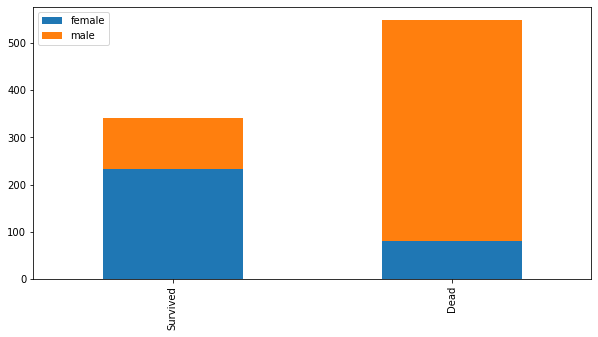

In [14]:
bar_chart('Sex') #성별에 관한 생존,죽음 비교

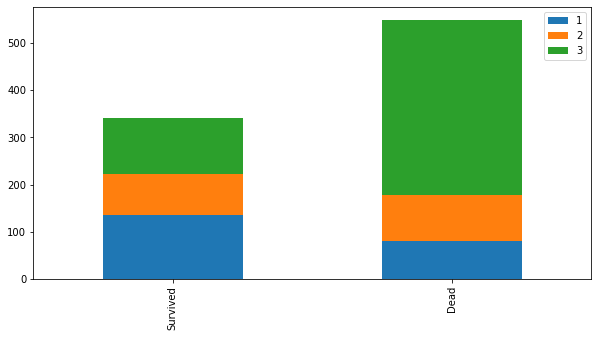

In [15]:
bar_chart('Pclass')  #객실등급(경제적지위)에 관한 생존,죽음 비교

# 객실등급이 높을수록 생존확률이 높다

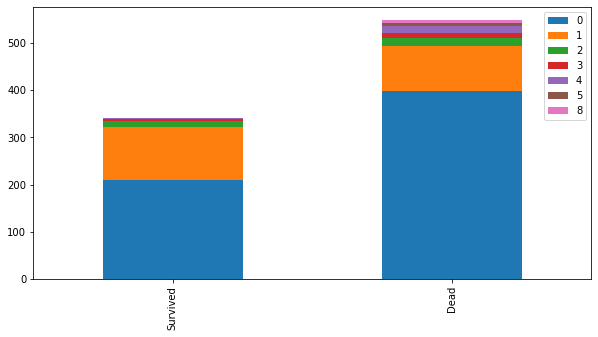

In [16]:
bar_chart('SibSp')  #형제자매나배우자수(부양가족)에 관한 생존,죽음 비교

# 가족부양수가 적을수록 생존확률이 높다

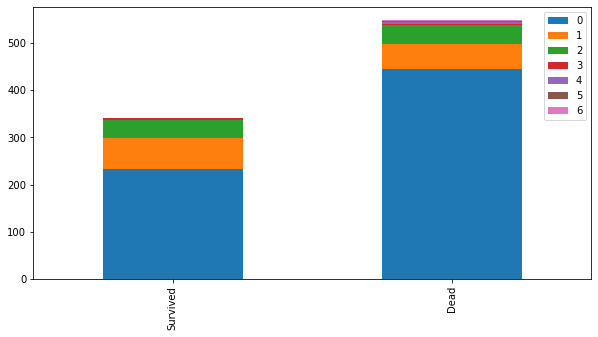

In [17]:
bar_chart('Parch')  #부양가족수(자식,부모)에 관한 생존,죽음 비교

# 피처엔지니어링

In [18]:
#이름을 확인해서 남자,여자(Mr,Mrs,Miss)를 비교해서 정보를 파악하자
train_test_data=[train,test] #훈련 및 테스트 데이터 세트 결합

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False) #extract표현을 이용해서 영문.이라는 표현의 글자만 추출

In [19]:
train['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [20]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Sir           1
Lady          1
Don           1
Countess      1
Jonkheer      1
Capt          1
Ms            1
Name: Title, dtype: int64

In [21]:
# Mr:0,Miss:1,Mrs:2,Others:3으로 표현
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Dr":3,"Rev":3,"Col":3,"Mlle":3,"Major":3,"Ms":3,"Lady":3,"Sir":3,"Capt":3,"Jonkheer":3,"Don":3,"Mme":3,"Countess":3}
for dataset in train_test_data:
    dataset['Title']=dataset['Title'].map(title_mapping) #title_mapping을 맵핑해서 새롭게 추가

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


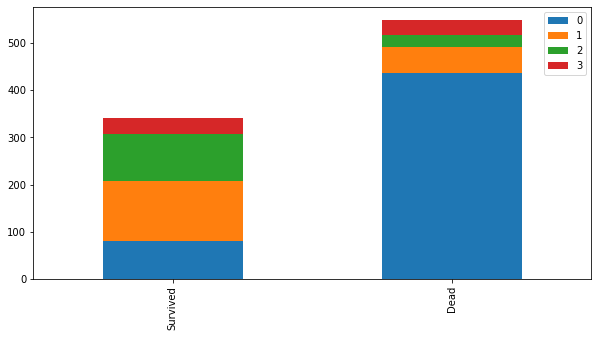

In [23]:
bar_chart('Title')  #성별에 따른 생존,죽음 유무 파악 Mr즉 남자가 많이 죽었다는 것을 알수가 있다.

In [24]:
# 데이터 셋에서 불필요한 feature 삭제,Name을 Title로 바꿔서 표현했기 때문에 필요가 없음
train.drop('Name',axis=1,inplace=True)
test.drop('Name',axis=1,inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
# 성별도 남자는 0으로 여자는 1로 바꿔서 표현
sex_mapping={"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

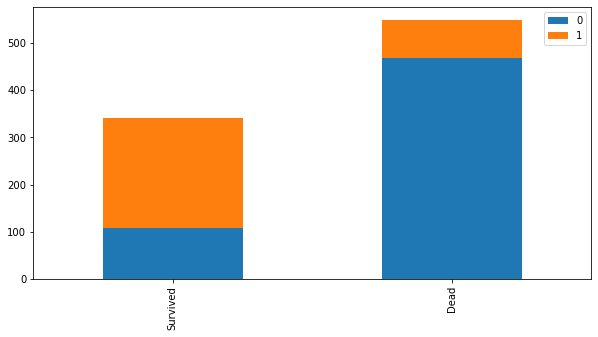

In [27]:
bar_chart('Sex')  #성별에 따른 생존,죽음 유무 파악 0즉 남자가 많이 죽었다는 것을 알수가 있다.

In [28]:
# Age를 이용하기로 했다. 하지만 누락된 값이 많다는 것을 확인했다. 따라서 평균값으로 대체해서 채워주는 방법을 이용하기로 했다.
# 하지만 좀더 의미있게 구하기 위해 Title에서 남성끼리 평균나이 Mr.끼리 평균나이 Miss끼리 평균나이를 구해서 채워주면 전체 평균을 구해 채워준다.
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)
test['Age'].fillna(train.groupby('Title')['Age'].transform('median'),inplace=True)

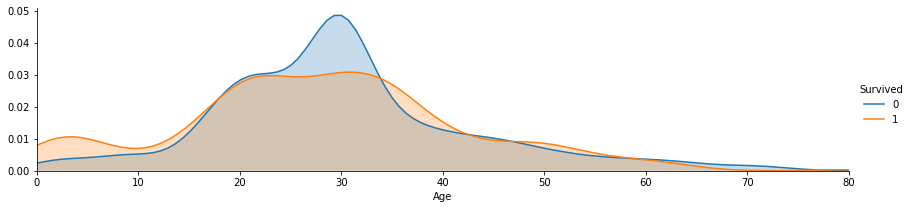

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

facet = sns.FacetGrid(train,hue="Survived",aspect=4) #sns.FacetGrid(다중 플롯 그리드)을 이용해서 train데이터의 생존여부로 나누겠다는 걸 의미 
facet.map(sns.kdeplot,'Age',shade=True) # 그림자 형태가 존재하고,age로 나누어 커널밀도추정그래프를 생성
facet.set(xlim=(0,train['Age'].max())) #x축을 0부터 age의max까지 지정한다.
facet.add_legend()   #범례를 추가한다.
sns.axes_style("darkgrid")

plt.show()

# 10대중반까지는 생존률이 높고 70대 근처의 분들은 사망률이 높다는 것 확인가능

(20.0, 30.0)

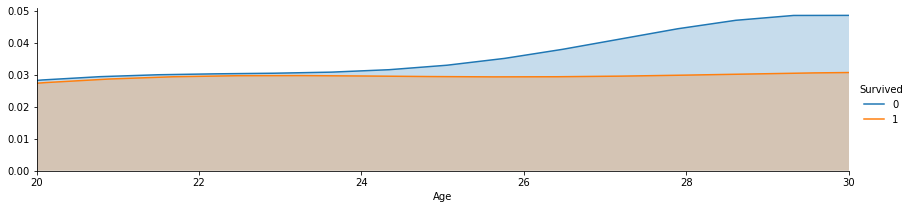

In [30]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,30) #20대의 사망,생존률 확인

(30.0, 40.0)

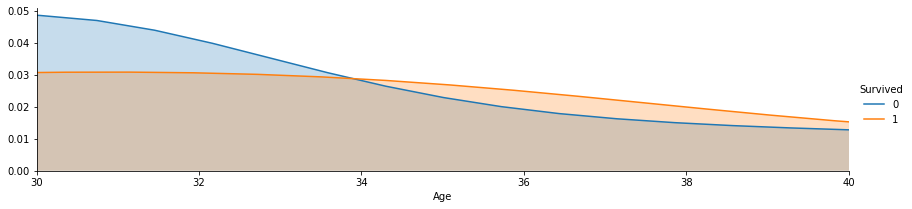

In [31]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40) #30대의 사망,생존률 확인

(40.0, 60.0)

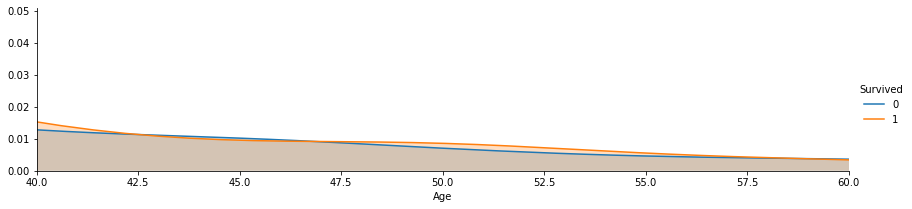

In [32]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,60) #30대의 사망,생존률 확인

(60.0, 80.0)

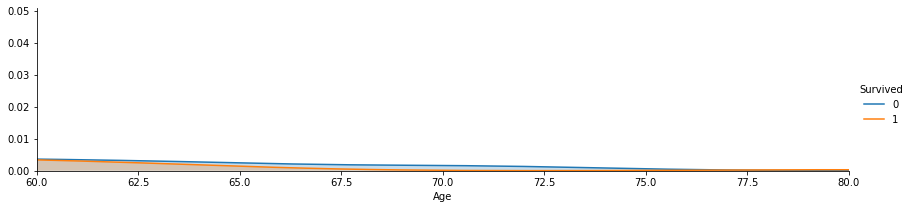

In [33]:
facet=sns.FacetGrid(train,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(60) #30대의 사망,생존률 확인

In [34]:
# 0살부터 80대 까지 너무 많은 정보가 있기 때문에 feature 엔지니어링에서 binning이라는 기술을 이용해 각각 하나의 카테고리에 나이를 담아 정보 확인가능
for dataset in train_test_data:
    dataset.loc[ dataset['Age']<=16,'Age']=0,
    dataset.loc[ (dataset['Age'] >16) & (dataset['Age'] <=26),'Age']=1,
    dataset.loc[ (dataset['Age'] >26) & (dataset['Age'] <=36),'Age']=2,
    dataset.loc[ (dataset['Age'] >36) & (dataset['Age'] <=62),'Age']=3,
    dataset.loc[ (dataset['Age'] >62),'Age']=4

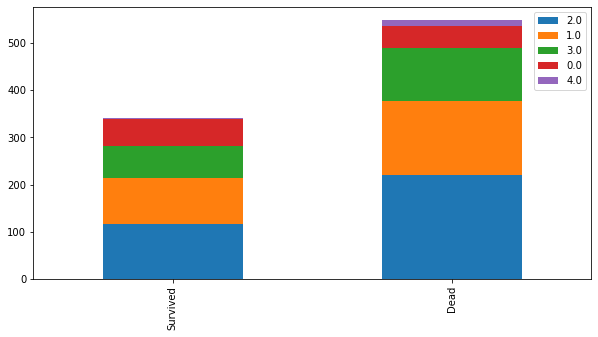

In [35]:
bar_chart('Age')  #나이대에 따른 생존,죽음 유무 파악 20,30대가 많이 죽었다는 것을 알수가 있다. 또 4에 해당하는 어르신들이 많이 사망한것을 볼수 있다.

# Embarked 

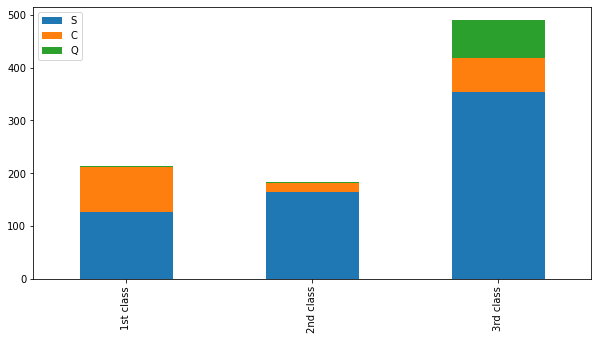

In [36]:
Pclass1=train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2=train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3=train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index=['1st class','2nd class','3rd class']
df.plot(kind='bar',stacked=True,figsize=(10,5))

In [37]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [38]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [39]:
embarked_mapping={'S':0,'C':1,'Q':2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [40]:
#티켓 가격은 클래스와 관련 높다.
train["Fare"].fillna(train.groupby('Pclass')['Fare'].transform('median'),inplace=True)
test["Fare"].fillna(test.groupby('Pclass')['Fare'].transform('median'),inplace=True)

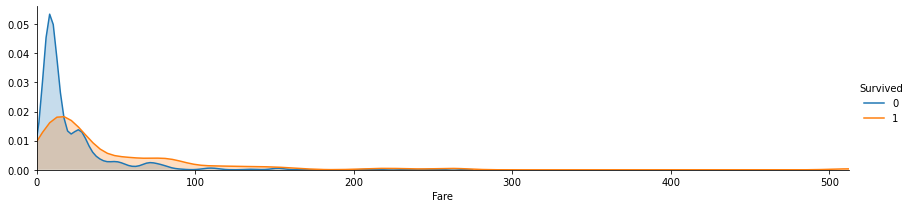

In [41]:
facet=sns.FacetGrid(train,hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()

plt.show()

(0.0, 20.0)

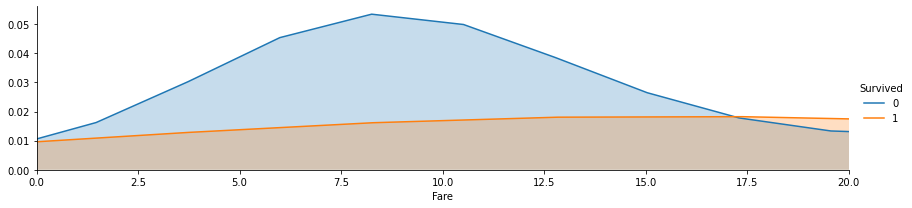

In [42]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,20)

(0.0, 30.0)

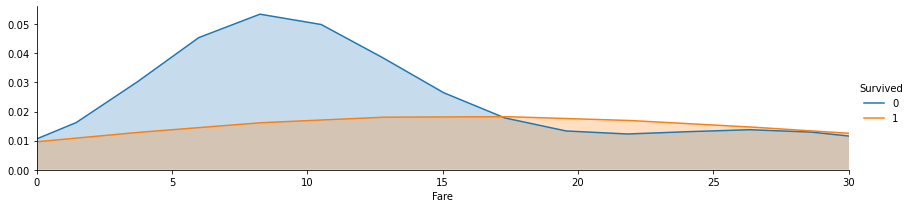

In [43]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0,30)

(0.0, 512.3292)

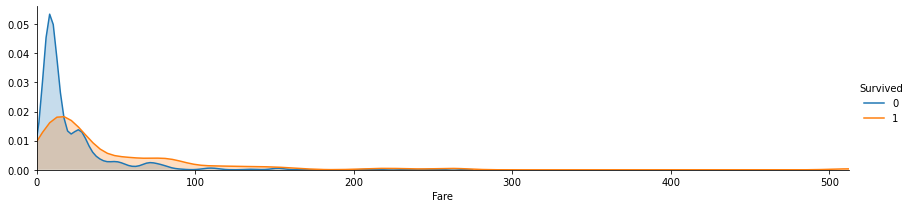

In [44]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0) # 티켓의 개수가 0이 되는 티켓의 가격

In [45]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <=17, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <=30), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <=100), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3,

In [46]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [47]:
train.Cabin.value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
E101           3
F33            3
              ..
C82            1
A31            1
C62 C64        1
A34            1
C91            1
Name: Cabin, Length: 147, dtype: int64

In [48]:
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].str[:1]

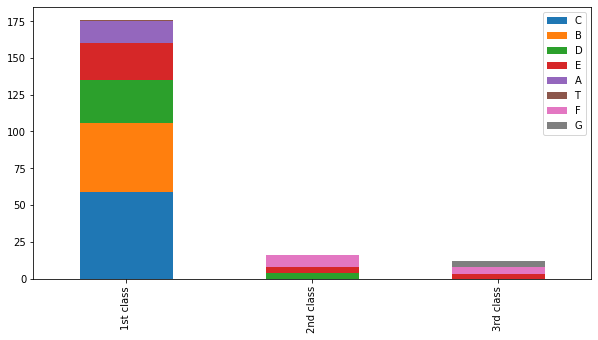

In [49]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind='bar', stacked=True, figsize=(10,5))

In [50]:
#1등급 ABCDET, 2등급 DEF 3등급 EFG
cabin_mapping = {'A':0, 'B':0.4, 'C':0.8, 'D':1.2, 'E':1.6, 'F':2, 'G':2.4, 'T': 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [51]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'),inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'),inplace=True)

In [52]:
# sibsb와 parch를 하나로 합쳐 하나의 값으로 만듦
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

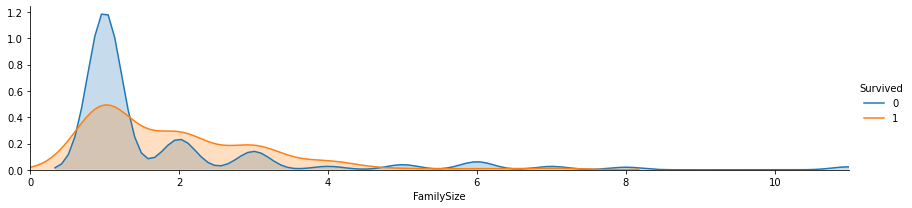

In [53]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot, 'FamilySize', shade=True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()

In [54]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [55]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [56]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)

In [57]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [58]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4
